In [2]:
# Import libraries
# Install seaborn & wordcloud if not already installed
%pip install seaborn
%pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import os
from pathlib import Path
from wordcloud import WordCloud
from collections import defaultdict


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Set paths
dataset_root = 'C:/Users/hp/Downloads/horse10/horse10'
labeled_data_dir = f'{dataset_root}/labeled-data'
image_extensions = ['.jpg', '.jpeg', '.png']

In [4]:
# --- Function to count images per subdirectory ---
def count_images_per_subdir(directory):
    subdir_counts = defaultdict(int)
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            count = sum(1 for f in os.listdir(subdir_path) if Path(f).suffix.lower() in image_extensions)
            subdir_counts[subdir] = count
    return subdir_counts

# Get image counts
subdir_counts = count_images_per_subdir(labeled_data_dir)
total_images = sum(subdir_counts.values())
num_subdirs = len(subdir_counts)

In [5]:
# --- Visualization 1: Summary Table ---
print("\nSummary Table:")
print(f"{'Subdirectory':<30} {'Image Count':<15}")
print("-" * 45)
for subdir, count in subdir_counts.items():
    print(f"{subdir:<30} {count:<15}")
print("-" * 45)
print(f"Total Images: {total_images}")
print(f"Number of Subdirectories: {num_subdirs}")


Summary Table:
Subdirectory                   Image Count    
---------------------------------------------
BrownHorseinShadow             308            
BrownHorseintoshadow           289            
Brownhorselight                306            
Brownhorseoutofshadow          341            
ChestnutHorseLight             318            
Chestnuthorseongrass           376            
GreyHorseLightandShadow        356            
GreyHorseNoShadowBadLight      286            
Sample1                        174            
Sample10                       235            
Sample11                       256            
Sample12                       288            
Sample13                       244            
Sample14                       168            
Sample15                       154            
Sample16                       212            
Sample17                       240            
Sample18                       159            
Sample19                       134           

C:\Users\hp\AppData\Local\Temp\ipykernel_90620\1798435013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(subdir_counts.values()), y=list(subdir_counts.keys()), palette='viridis')


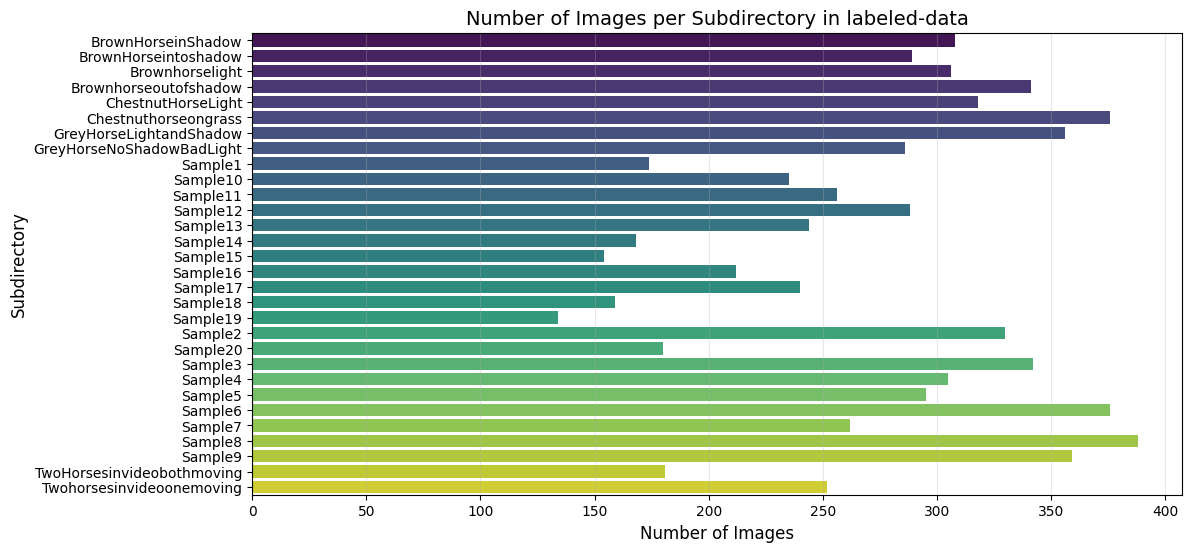

In [6]:
# --- Visualization 2: Bar Plot of Image Counts per Subdirectory ---
plt.figure(figsize=(12, 6))
sns.barplot(x=list(subdir_counts.values()), y=list(subdir_counts.keys()), palette='viridis')
plt.title('Number of Images per Subdirectory in labeled-data', fontsize=14)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Subdirectory', fontsize=12)
plt.grid(True, axis='x', alpha=0.3)
plt.show()

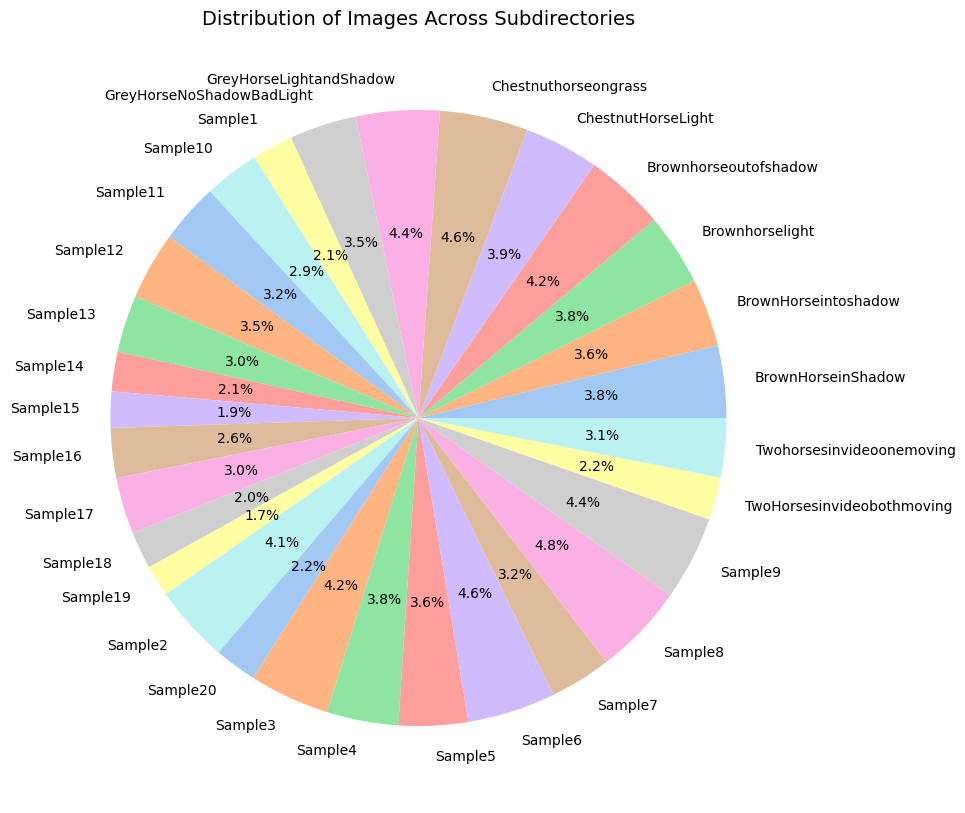

In [7]:
# --- Visualization 3: Pie Chart of Image Distribution ---
plt.figure(figsize=(10, 10))
plt.pie(subdir_counts.values(), labels=subdir_counts.keys(), autopct='%1.1f%%', colors=sns.color_palette('pastel', len(subdir_counts)))
plt.title('Distribution of Images Across Subdirectories', fontsize=14)
plt.show()

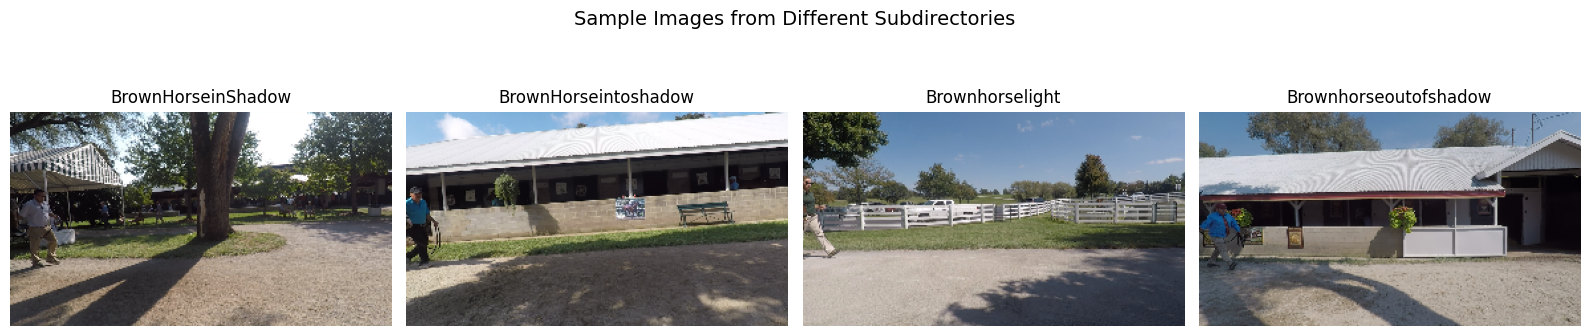

In [8]:
# --- Visualization 4: Sample Images from Subdirectories ---
def plot_sample_images(subdir_counts, num_samples=4):
    selected_subdirs = list(subdir_counts.keys())[:min(num_samples, len(subdir_counts))]
    fig, axes = plt.subplots(1, len(selected_subdirs), figsize=(4 * len(selected_subdirs), 4))
    if len(selected_subdirs) == 1:
        axes = [axes]
    
    for i, subdir in enumerate(selected_subdirs):
        subdir_path = os.path.join(labeled_data_dir, subdir)
        img_files = [f for f in os.listdir(subdir_path) if Path(f).suffix.lower() in image_extensions]
        if img_files:
            img_path = os.path.join(subdir_path, img_files[0])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img)
            axes[i].set_title(subdir, fontsize=12)
            axes[i].axis('off')
    
    plt.suptitle('Sample Images from Different Subdirectories', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_sample_images(subdir_counts)

In [9]:
# Path to CSV
csv_path = 'C:/Users/hp/Downloads/horse10/horse10/labeled-data/CollectedData_Byron.csv'

# Load CSV, skipping metadata rows
df = pd.read_csv(csv_path, skiprows=2)

# Print column names to debug
print("Column names:", df.columns.tolist())

# Assume the first column contains image paths (adjust if needed)
image_column = df.columns[0]  # First column, regardless of name

# Count unique images
unique_images = len(df[image_column].unique())
print(f"Total unique images in CollectedData_Byron.csv: {unique_images}")

Column names: ['coords', 'x', 'y', 'x.1', 'y.1', 'x.2', 'y.2', 'x.3', 'y.3', 'x.4', 'y.4', 'x.5', 'y.5', 'x.6', 'y.6', 'x.7', 'y.7', 'x.8', 'y.8', 'x.9', 'y.9', 'x.10', 'y.10', 'x.11', 'y.11', 'x.12', 'y.12', 'x.13', 'y.13', 'x.14', 'y.14', 'x.15', 'y.15', 'x.16', 'y.16', 'x.17', 'y.17', 'x.18', 'y.18', 'x.19', 'y.19', 'x.20', 'y.20', 'x.21', 'y.21']
Total unique images in CollectedData_Byron.csv: 8114


In [10]:
df = pd.read_csv('C:/Users/hp/Downloads/horse10/horse10/labeled-data/CollectedData_Byron.csv')
print(df.columns)
print(df.head())

Index(['scorer', 'Byron', 'Byron.1', 'Byron.2', 'Byron.3', 'Byron.4',
       'Byron.5', 'Byron.6', 'Byron.7', 'Byron.8', 'Byron.9', 'Byron.10',
       'Byron.11', 'Byron.12', 'Byron.13', 'Byron.14', 'Byron.15', 'Byron.16',
       'Byron.17', 'Byron.18', 'Byron.19', 'Byron.20', 'Byron.21', 'Byron.22',
       'Byron.23', 'Byron.24', 'Byron.25', 'Byron.26', 'Byron.27', 'Byron.28',
       'Byron.29', 'Byron.30', 'Byron.31', 'Byron.32', 'Byron.33', 'Byron.34',
       'Byron.35', 'Byron.36', 'Byron.37', 'Byron.38', 'Byron.39', 'Byron.40',
       'Byron.41', 'Byron.42', 'Byron.43'],
      dtype='object')
                        scorer Byron Byron.1 Byron.2 Byron.3   Byron.4  \
0                    bodyparts  Nose    Nose     Eye     Eye  Nearknee   
1                       coords     x       y       x       y         x   
2  BrownHorseinShadow/0050.png  17.0   302.0     NaN     NaN       NaN   
3  BrownHorseinShadow/0051.png  21.0   304.0     NaN     NaN       NaN   
4  BrownHorseinShadow/005

In [11]:
df = pd.read_csv(csv_path, nrows=1)  # Read only the first row
body_parts = df.iloc[0, 1::2].values  # Get every other column starting from 'Byron' (x-coordinates)
print("Body Parts:", body_parts)

Body Parts: ['Nose' 'Eye' 'Nearknee' 'Nearfrontfetlock' 'Nearfrontfoot' 'Offknee' 'Offfrontfetlock' 'Offfrontfoot' 'Shoulder' 'Midshoulder' 'Elbow' 'Girth' 'Wither' 'Nearhindhock' 'Nearhindfetlock' 'Nearhindfoot' 'Hip' 'Stifle' 'Offhindhock' 'Offhindfetlock' 'Offhindfoot' 'Ischium']


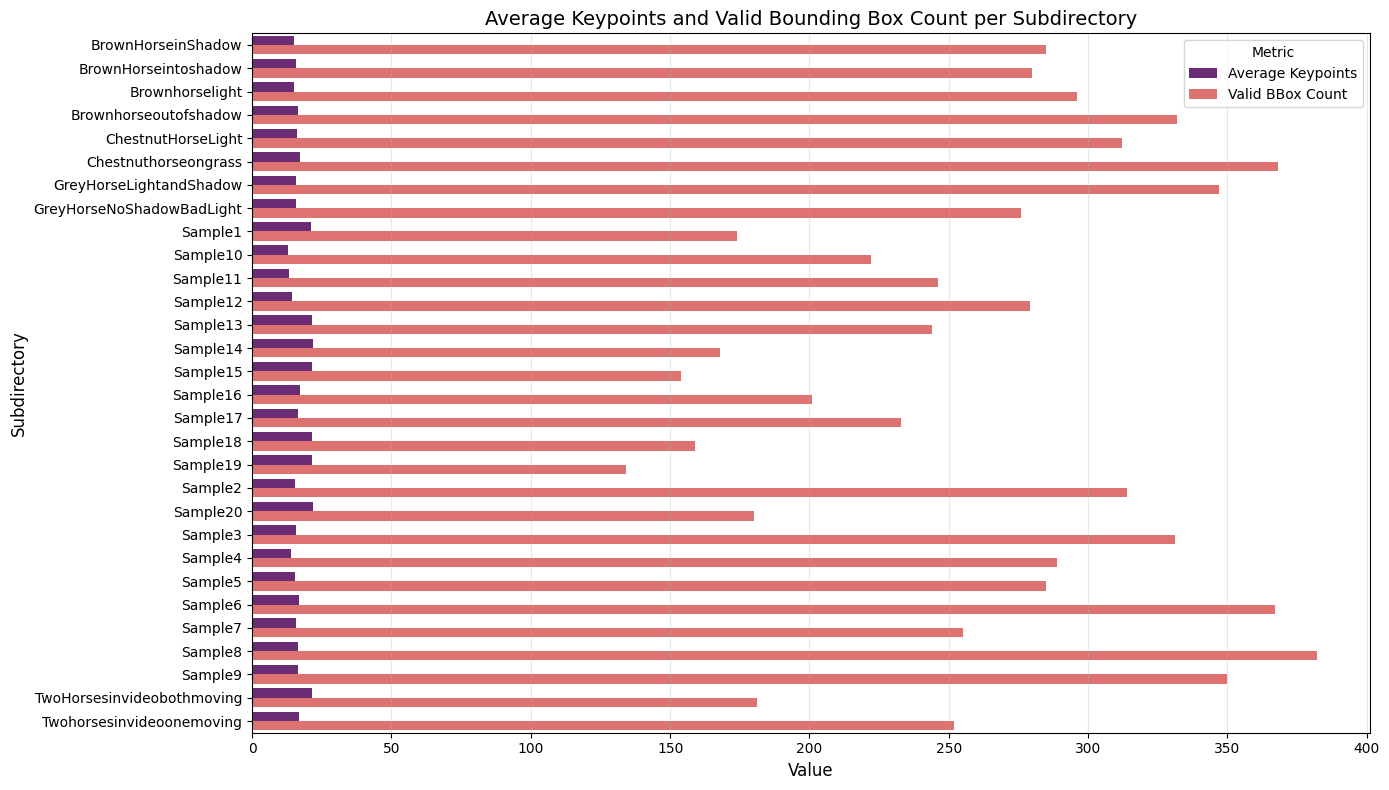

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

average_keypoints = {}
valid_bbox_counts = {}

for subdir, count in subdir_counts.items():
    subdir_path = os.path.join(labeled_data_dir, subdir)
    csv_file = os.path.join(subdir_path, 'CollectedData_Byron.csv')
    
    if os.path.exists(csv_file):
        subdir_df = pd.read_csv(csv_file, skiprows=2)

        # Calcul des keypoints valides
        subdir_df['valid_keypoints'] = subdir_df.iloc[:, 1:].notnull().sum(axis=1) // 2
        average_keypoints[subdir] = subdir_df['valid_keypoints'].mean()

        # Extraire coordonnées
        x_coords = subdir_df.iloc[:, 1::2]
        y_coords = subdir_df.iloc[:, 2::2]

        # Largeur et hauteur des bounding boxes
        width = x_coords.max(axis=1) - x_coords.min(axis=1)
        height = y_coords.max(axis=1) - y_coords.min(axis=1)

        # Compter les images avec bounding box valide (width > 0 et height > 0)
        valid_bbox_mask = (width > 0) & (height > 0)
        valid_bbox_counts[subdir] = valid_bbox_mask.sum()

# Création du DataFrame pour visualisation
visualization_df = pd.DataFrame({
    'Subdirectory': list(average_keypoints.keys()),
    'Average Keypoints': list(average_keypoints.values()),
    'Valid BBox Count': [valid_bbox_counts[subdir] for subdir in average_keypoints]
})

# Transformation pour le graphique
melted_df = visualization_df.melt(id_vars='Subdirectory', var_name='Metric', value_name='Value')

# Affichage
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_df, x='Value', y='Subdirectory', hue='Metric', palette='magma')
plt.title('Average Keypoints and Valid Bounding Box Count per Subdirectory', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Subdirectory', fontsize=12)
plt.legend(title='Metric')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_90620\1735359159.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=empty_df, x='Empty Image Count', y='Subdirectory', palette='Reds_r')


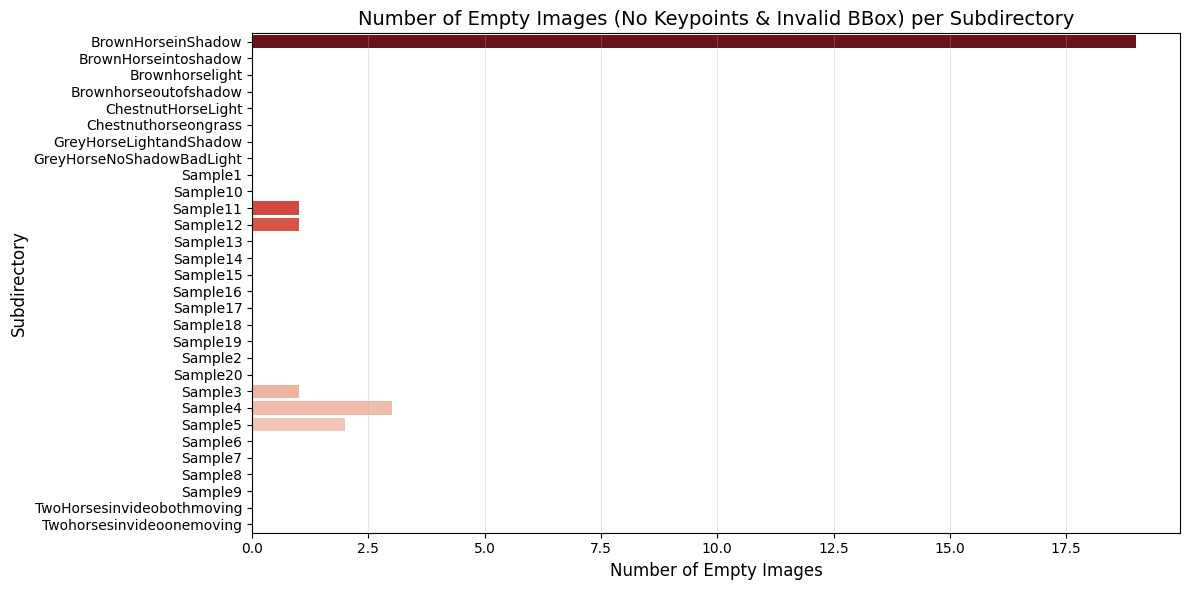

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

empty_image_counts = {}

for subdir, count in subdir_counts.items():
    subdir_path = os.path.join(labeled_data_dir, subdir)
    csv_file = os.path.join(subdir_path, 'CollectedData_Byron.csv')
    
    if os.path.exists(csv_file):
        subdir_df = pd.read_csv(csv_file, skiprows=2)

        # Calcul des keypoints valides
        subdir_df['valid_keypoints'] = subdir_df.iloc[:, 1:].notnull().sum(axis=1) // 2

        # Extraire coordonnées
        x_coords = subdir_df.iloc[:, 1::2]
        y_coords = subdir_df.iloc[:, 2::2]

        width = x_coords.max(axis=1) - x_coords.min(axis=1)
        height = y_coords.max(axis=1) - y_coords.min(axis=1)

        # Identifier les images "vides" (aucun keypoint ET bbox invalide)
        empty_mask = (subdir_df['valid_keypoints'] == 0) & ((width <= 0) | (height <= 0) | width.isna() | height.isna())
        empty_image_counts[subdir] = empty_mask.sum()

# Visualisation
empty_df = pd.DataFrame({
    'Subdirectory': list(empty_image_counts.keys()),
    'Empty Image Count': list(empty_image_counts.values())
})

plt.figure(figsize=(12, 6))
sns.barplot(data=empty_df, x='Empty Image Count', y='Subdirectory', palette='Reds_r')
plt.title('Number of Empty Images (No Keypoints & Invalid BBox) per Subdirectory', fontsize=14)
plt.xlabel('Number of Empty Images', fontsize=12)
plt.ylabel('Subdirectory', fontsize=12)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
csv_path = 'C:/Users/hp/Downloads/horse10/horse10/labeled-data/CollectedData_Byron.csv'
df = pd.read_csv(csv_path, skiprows=2)

# Count valid keypoints per image (divide by 2 for x,y pairs)
df['valid_keypoints'] = df.iloc[:, 1:].notnull().sum(axis=1) // 2
print("Keypoint count distribution:")
print(df['valid_keypoints'].value_counts().sort_index())
print(f"Images with ≥5 keypoints: {len(df[df['valid_keypoints'] >= 22])}")

Keypoint count distribution:
valid_keypoints
0       27
1      191
2      312
3      131
4      143
5      344
6       91
7      126
8      108
9      200
10      83
11     117
12     134
13     290
14     160
15     164
16     162
17      95
18     167
19     268
20     603
21    1129
22    3069
Name: count, dtype: int64
Images with ≥5 keypoints: 3069


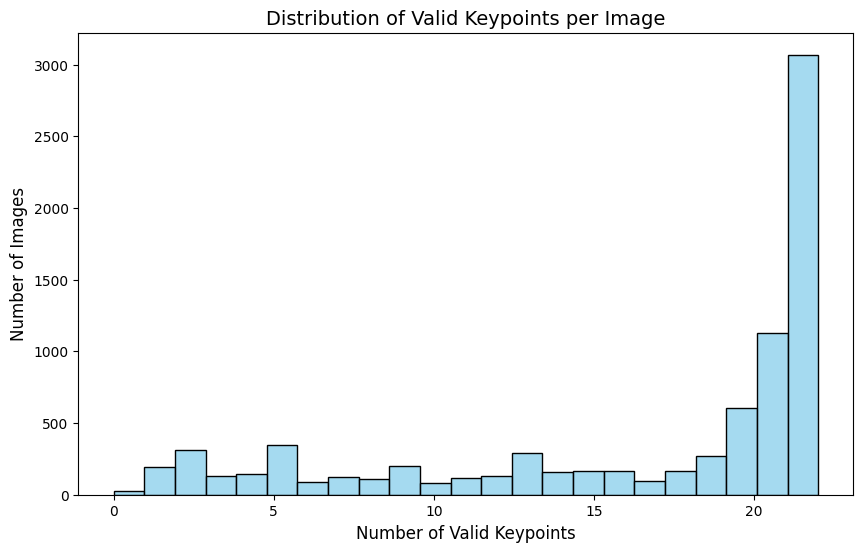

In [15]:
# --- Data Visualization: Keypoint Analysis ---

# Load CSV
df = pd.read_csv(csv_path, skiprows=2)
df_header = pd.read_csv(csv_path, nrows=1)
body_parts = df_header.iloc[0, 1::2].values
columns = ['image_path'] + [f'{bp}_{coord}' for bp in body_parts for coord in ['x', 'y']]
df.columns = columns
df['valid_keypoints'] = df.iloc[:, 1:].notnull().sum(axis=1) // 2

# Histogram of Keypoint Counts
plt.figure(figsize=(10, 6))
sns.histplot(df['valid_keypoints'], bins=23, kde=False, color='skyblue')
plt.title('Distribution of Valid Keypoints per Image', fontsize=14)
plt.xlabel('Number of Valid Keypoints', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.show()

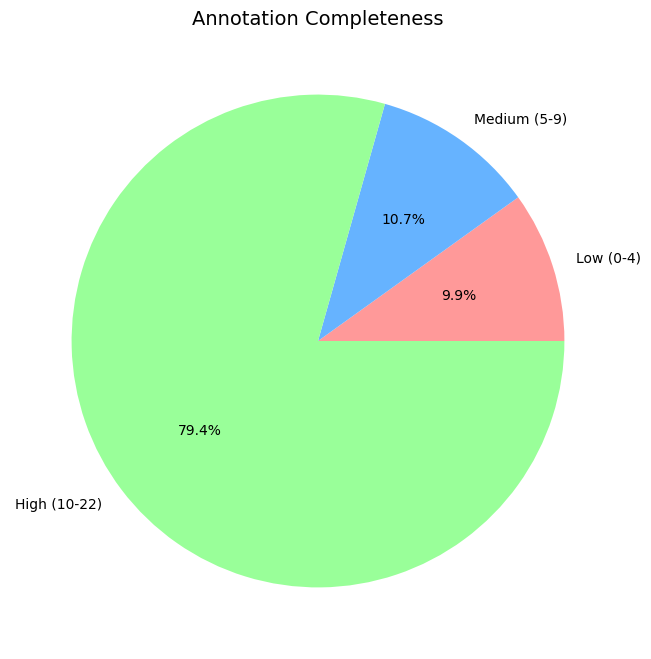

In [16]:
# Pie Chart of Annotation Completeness
categories = {
    'Low (0-4)': len(df[df['valid_keypoints'] <= 4]),
    'Medium (5-9)': len(df[(df['valid_keypoints'] >= 5) & (df['valid_keypoints'] <= 9)]),
    'High (10-22)': len(df[df['valid_keypoints'] >= 10])
}
plt.figure(figsize=(8, 8))
plt.pie(categories.values(), labels=categories.keys(), autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Annotation Completeness', fontsize=14)
plt.show()

In [17]:
total_no_bbox_with_kp = 0
total_no_bbox_without_kp = 0

for subdir in subdir_counts:
    subdir_path = os.path.join(labeled_data_dir, subdir)
    csv_file = os.path.join(subdir_path, 'CollectedData_Byron.csv')

    if os.path.exists(csv_file):
        df = pd.read_csv(csv_file, skiprows=2)

        # Compute valid keypoints
        df['valid_keypoints'] = df.iloc[:, 1:].notnull().sum(axis=1) // 2

        # Extract x and y coordinates
        x_coords = df.iloc[:, 1::2]
        y_coords = df.iloc[:, 2::2]
        width = x_coords.max(axis=1) - x_coords.min(axis=1)
        height = y_coords.max(axis=1) - y_coords.min(axis=1)

        # Invalid bounding box condition
        no_bbox_mask = (width <= 0) | (height <= 0) | width.isna() | height.isna()

        # Case 1: No BBox + at least 1 keypoint
        case1_mask = no_bbox_mask & (df['valid_keypoints'] >= 1)
        total_no_bbox_with_kp += case1_mask.sum()

        # Case 2: No BBox + 0 keypoints
        case2_mask = no_bbox_mask & (df['valid_keypoints'] == 0)
        total_no_bbox_without_kp += case2_mask.sum()

print(f"Total photos with NO bounding box and AT LEAST 1 keypoint: {total_no_bbox_with_kp}")
print(f"Total photos with NO bounding box and NO keypoints: {total_no_bbox_without_kp}")


Total photos with NO bounding box and AT LEAST 1 keypoint: 191
Total photos with NO bounding box and NO keypoints: 27


In [18]:
%pip install scikit-learn
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [19]:
import pandas as pd
import os
import cv2
import shutil
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split

# Version identifier
print("Running convert.py version: f3a7c9d2-e5b8-4a1d-9c2b-a8f6d0e7f1c8")

# Paths
dataset_root = 'C:/Users/hp/Downloads/horse10/horse10'
labeled_data_dir = f'{dataset_root}/labeled-data'
csv_path = f'{dataset_root}/labeled-data/CollectedData_Byron.csv'
output_dir = f'{dataset_root}/data'

# Clear the output directory
if os.path.exists(output_dir):
    try:
        shutil.rmtree(output_dir)
        print(f"Cleared existing directory: {output_dir}")
    except Exception as e:
        print(f"Failed to clear directory {output_dir}: {e}")
        raise
os.makedirs(output_dir, exist_ok=True)

# Create directories for YOLO dataset
for split in ['train', 'val', 'test']:
    os.makedirs(f'{output_dir}/{split}/images', exist_ok=True)
    os.makedirs(f'{output_dir}/{split}/labels', exist_ok=True)

# Load CSV and extract body parts
df_header = pd.read_csv(csv_path, nrows=1)
body_parts = df_header.iloc[0, 1::2].values  # Get body parts (x-coordinates)
num_keypoints = len(body_parts)

# Create column names
columns = ['image_path']
for bp in body_parts:
    columns.extend([f'{bp}_x', f'{bp}_y'])

# Load CSV, skipping metadata rows
df = pd.read_csv(csv_path, skiprows=2)
df.columns = columns

# Log sample CSV data
print("\nSample CSV rows:")
print(df.head(2))

# Get unique image paths
image_paths = df['image_path'].unique()
print(f"Total unique images in CSV: {len(image_paths)}")

# Check for duplicate filenames
filenames = [Path(p).name for p in image_paths]
unique_filenames = set(filenames)
print(f"Total unique filenames: {len(unique_filenames)} (out of {len(filenames)} images)")
if len(unique_filenames) != len(filenames):
    print("Warning: Duplicate filenames detected, will use subdirectory prefix to avoid overwrites")

# Split dataset (80% train, 10% val, 10% test)
train_paths, temp_paths = train_test_split(image_paths, test_size=0.2, random_state=42)
val_paths, test_paths = train_test_split(temp_paths, test_size=0.5, random_state=42)

def save_annotations(image_paths, split):
    skipped = {'no_valid_keypoints': 0, 'image_not_found': 0, 'failed_to_load': 0, 'write_failed': 0}
    processed = 0
    for img_path in image_paths:
        # Construct full image path
        full_img_path = os.path.join(labeled_data_dir, img_path)
        if not os.path.exists(full_img_path):
           # print(f"Skipping {img_path}: Image not found")
            skipped['image_not_found'] += 1
            continue

        # Read image to get dimensions
        img = cv2.imread(full_img_path)
        if img is None:
            # print(f"Skipping {img_path}: Failed to load image")
            skipped['failed_to_load'] += 1
            continue
        h, w = img.shape[:2]

        # Get annotations for this image
        img_annotations = df[df['image_path'] == img_path]

        # Create unique filename using subdirectory prefix
        subdir = img_path.split(os.sep)[0]  # e.g., 'Sample1' from 'Sample1/0423.png'
        base_name = Path(img_path).name  # e.g., '0423.png'
        unique_name = f"{subdir}_{base_name}"  # e.g., 'Sample1_0423.png'

        # Create label file
        label_path = f'{output_dir}/{split}/labels/{Path(unique_name).stem}.txt'
        os.makedirs(os.path.dirname(label_path), exist_ok=True)
        with open(label_path, 'w') as f:
            for _, row in img_annotations.iterrows():
                keypoints = []
                valid_points = []

                # Process keypoints
                for bp in body_parts:
                    x = row[f'{bp}_x']
                    y = row[f'{bp}_y']
                    if pd.notnull(x) and pd.notnull(y):
                        try:
                            x = float(x)
                            y = float(y)
                            if x < 0 or x > w or y < 0 or y > h:
                                original_x, original_y = x, y
                                x = max(0, min(w, x))
                                y = max(0, min(h, y))
                               # print(f"Rescaled keypoint for {img_path} ({bp}: x={original_x} to x={x}, y={original_y} to y={y})")
                            x_norm = x / w
                            y_norm = y / h
                            vis = 1
                            valid_points.append([x, y])
                        except (ValueError, TypeError):
                           # print(f"Invalid keypoint for {img_path} ({bp}: x={x}, y={y}), marking as not visible")
                            x_norm = 0
                            y_norm = 0
                            vis = 0
                    else:
                        x_norm = 0
                        y_norm = 0
                        vis = 0
                    keypoints.extend([x_norm, y_norm, vis])

                # Count valid keypoints
                valid_keypoints = sum(1 for i in range(2, len(keypoints), 3) if keypoints[i] == 1)
               # print(f"Image {img_path}: {valid_keypoints} valid keypoints")

                # Compute bounding box using cv2.boundingRect
                x_center_norm = 0.5
                y_center_norm = 0.5
                w_bb_norm = 0.1
                h_bb_norm = 0.1
                if valid_points:
                    points = np.array(valid_points, dtype=np.float32)
                    x, y, w_bb, h_bb = cv2.boundingRect(points)
                    margin = 0.1  # Add 10% margin
                    w_bb = w_bb * (1 + margin)
                    h_bb = h_bb * (1 + margin)
                    x_center = x + w_bb / 2
                    y_center = y + h_bb / 2
                    x_center_norm = x_center / w
                    y_center_norm = y_center / h
                    w_bb_norm = w_bb / w
                    h_bb_norm = h_bb / h
                   # print(f"Bounding box for {img_path}: x={x}, y={y}, w={w_bb}, h={h_bb}, valid={0 <= x_center_norm <= 1 and 0 <= y_center_norm <= 1}")

                # Fix invalid bounding box
                if w_bb_norm <= 0 or h_bb_norm <= 0 or not (0 <= x_center_norm <= 1 and 0 <= y_center_norm <= 1):
                   # print(f"Warning: {img_path} has invalid bounding box, using default (keypoints: {valid_keypoints})")
                    x_center_norm = 0.5
                    y_center_norm = 0.5
                    w_bb_norm = 0.1
                    h_bb_norm = 0.1

                # Write to file
                line = [0, x_center_norm, y_center_norm, w_bb_norm, h_bb_norm] + keypoints
                try:
                    f.write(' '.join(map(str, line)) + '\n')
                except Exception as e:
                    # print(f"Failed to write label for {img_path}: {e}")
                    skipped['write_failed'] += 1
                    continue

                # Copy image
                dest_img_path = f'{output_dir}/{split}/images/{unique_name}'
                os.makedirs(os.path.dirname(dest_img_path), exist_ok=True)
                try:
                    shutil.copy(full_img_path, dest_img_path)
                    if not os.path.exists(dest_img_path):
                        raise FileNotFoundError(f"Image copy failed: {dest_img_path} does not exist after copy")
                    # print(f"Successfully processed {img_path} -> {unique_name}")
                    processed += 1
                except Exception as e:
                    # print(f"Failed to copy image {img_path}: {e}")
                    skipped['write_failed'] += 1
                    continue

    print(f"{split.capitalize()} set: Processed {processed}, Skipped {sum(skipped.values())} "
          f"(No valid keypoints: {skipped['no_valid_keypoints']}, Image not found: {skipped['image_not_found']}, "
          f"Failed to load: {skipped['failed_to_load']}, Write failed: {skipped['write_failed']})")

# Process splits
save_annotations(train_paths, 'train')
save_annotations(val_paths, 'val')
save_annotations(test_paths, 'test')

# Create data.yaml
data_yaml = f"""
train: ./data/train/images
val: ./data/val/images
test: ./data/test/images

nc: 1
names: ['horse']

kpt_shape: [{num_keypoints}, 3]  # {num_keypoints} keypoints, 3 for (x, y, visibility)
flip_idx: [{', '.join(map(str, range(num_keypoints)))}]  # Adjust if needed
"""
with open(f'{dataset_root}/data.yaml', 'w') as f:
    f.write(data_yaml)

Running convert.py version: f3a7c9d2-e5b8-4a1d-9c2b-a8f6d0e7f1c8
Cleared existing directory: C:/Users/hp/Downloads/horse10/horse10/data

Sample CSV rows:
                    image_path  Nose_x  Nose_y  Eye_x  Eye_y  Nearknee_x  \
0  BrownHorseinShadow/0050.png    17.0   302.0    NaN    NaN         NaN   
1  BrownHorseinShadow/0051.png    21.0   304.0    NaN    NaN         NaN   

   Nearknee_y  Nearfrontfetlock_x  Nearfrontfetlock_y  Nearfrontfoot_x  ...  \
0         NaN                 NaN                 NaN              NaN  ...   
1         NaN                 NaN                 NaN              NaN  ...   

   Stifle_x  Stifle_y  Offhindhock_x  Offhindhock_y  Offhindfetlock_x  \
0       NaN       NaN            NaN            NaN               NaN   
1       NaN       NaN            NaN            NaN               NaN   

   Offhindfetlock_y  Offhindfoot_x  Offhindfoot_y  Ischium_x  Ischium_y  
0               NaN            NaN            NaN        NaN        NaN  
1          

In [ ]:
import os
from pathlib import Path

# Define the dataset root
dataset_root = 'C:/Users/hp/Downloads/horse10/horse10'
labeled_data_dir = f'{dataset_root}/labeled-data'
data_dir = f'{dataset_root}/data'
image_extensions = ['.jpg', '.jpeg', '.png']  # Common image extensions

# Function to count images in a directory and its subdirectories
def count_images(directory):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return 0
    count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if Path(file).suffix.lower() in image_extensions:
                count += 1
    return count

# Count images in labeled-data (original dataset)
labeled_data_count = count_images(labeled_data_dir)
print(f"Total images in labeled-data: {labeled_data_count}")

# Count images in data (processed train/val/test splits)
data_count = count_images(data_dir)
print(f"Total images in data (train/val/test): {data_count}")

# Count images in each split (if data directory exists)
if os.path.exists(data_dir):
    for split in ['train', 'val', 'test']:
        split_dir = f'{data_dir}/{split}/images'
        split_count = count_images(split_dir)
        print(f"{split.capitalize()} set: {split_count} images")

Total images in labeled-data: 8114
Total images in data (train/val/test): 8114
Train set: 6491 images
Val set: 811 images
Test set: 812 images


: 

In [ ]:
## Model Training with YOLOv8s-pose

# Install ultralytics if not already installed
%pip install ultralytics

from ultralytics import YOLO

# Load the YOLOv8s-pose model
model = YOLO('yolov8s.pt')

# Training parameters
params = {
    'data': f'{dataset_root}/data.yaml',
    'epochs': 50,
    'imgsz': 640,
    'batch': 16,
    'device': 'cpu',  # Use CPU since no GPU is available
    'patience': 20,
    'project': 'runs/train',
    'name': 'yolov8s-pose_finetuned',
    'pretrained': True,
    'plots': True,
    'val': True,
    'save': True,
    'exist_ok': True
}

# Train the model
print("Training YOLOv8s-pose...")
model.train(**params)


Training YOLOv8s-pose...
Ultralytics 8.3.122  Python-3.8.20 torch-2.4.1+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/hp/Downloads/horse10/horse10/data.yaml, epochs=50, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=runs/train, name=yolov8s-pose_finetuned, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

train: Scanning C:\Users\hp\Downloads\horse10\horse10\data\train\labels\BrownHorseinShadow... 0 images, 6491 backgrounds, 0 corrupt: 100%|██████████| 6491/6491 [00:43<00:00, 148.08it/s]

WARNING train: No labels found in C:\Users\hp\Downloads\horse10\horse10\data\train\labels\BrownHorseinShadow.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


train: New cache created: C:\Users\hp\Downloads\horse10\horse10\data\train\labels\BrownHorseinShadow.cache
WARNING No labels found in C:\Users\hp\Downloads\horse10\horse10\data\train\labels\BrownHorseinShadow.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: Fast image access  (ping: 0.30.1 ms, read: 4.40.5 MB/s, size: 90.2 KB)


val: Scanning C:\Users\hp\Downloads\horse10\horse10\data\val\labels\BrownHorseinShadow... 0 images, 811 backgrounds, 0 corrupt: 100%|██████████| 811/811 [00:04<00:00, 169.35it/s]

WARNING val: No labels found in C:\Users\hp\Downloads\horse10\horse10\data\val\labels\BrownHorseinShadow.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


val: New cache created: C:\Users\hp\Downloads\horse10\horse10\data\val\labels\BrownHorseinShadow.cache
WARNING No labels found in C:\Users\hp\Downloads\horse10\horse10\data\val\labels\BrownHorseinShadow.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to runs\train\yolov8s-pose_finetuned\labels.jpg... 
WARNING zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\train\yolov8s-pose_finetuned
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/406 [00:00<?, ?it/s]